In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from collections import Counter

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [3]:
df = pd.read_csv(r'./cover types/covtype.csv')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\pawel\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\pawel\anaconda3\lib\site-packages\scipy\stats\stats.py:4814: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))
C:\Users\pawel\anaconda3\lib\site-packages\missingno\missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
C:\Users\pawel\anaconda3\lib\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from 

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

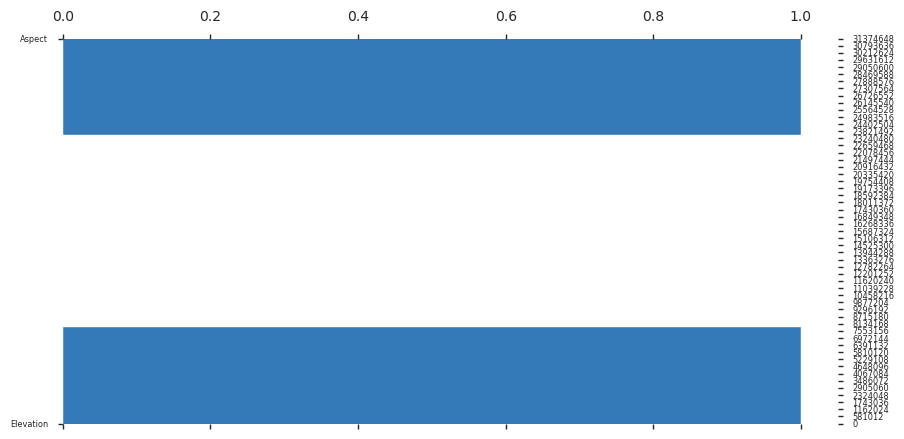

In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
df[df['Vertical_Distance_To_Hydrology']<0]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
16,2610,259,1,120,-1,607,216,239,161,6096,...,0,0,0,0,0,0,0,0,0,5
26,2489,163,10,30,-4,849,230,243,145,5486,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580705,2707,95,8,595,-11,579,234,228,126,1500,...,0,0,0,0,0,0,0,0,0,3
580728,2505,239,27,480,-94,421,160,250,218,1087,...,0,0,0,0,0,0,0,0,0,3
580729,2518,243,31,474,-81,420,145,246,227,1075,...,0,0,0,0,0,0,0,0,0,3
580730,2538,250,40,458,-61,420,106,232,242,1064,...,0,0,0,0,0,0,0,0,0,3


In [9]:
df.duplicated().any()

False

In [10]:
any(df.isna().any())

False

In [11]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [12]:
X = df.iloc[:, :-1]        # Independent variables
y = df.iloc[:, -1]         # Dependent variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
scaler = StandardScaler()

In [15]:
cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [16]:
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()

In [17]:
for col in cols:
    X_train_scaled[col] = scaler.fit_transform(X_train[[col]])

In [18]:
for col in cols:
    X_test_scaled[col] = scaler.fit(X_train[[col]]).transform(X_test[[col]])

In [19]:
X_train_scaled.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
279523,-1.840645,-1.354787,0.120681,0.937630,3.511196,-0.854025,-0.492531,-0.673896,0.117416,-0.742636,...,0,0,0,0,0,0,0,0,0,0
562159,1.412873,-0.532583,1.189125,2.084774,0.284457,-0.848896,1.377250,-1.179749,-1.973510,2.652358,...,0,0,0,0,0,0,0,0,0,1
83158,0.102180,1.549739,-1.348429,-0.703162,-0.625209,0.500198,-0.081179,0.590736,0.535601,3.257474,...,0,0,0,0,0,0,0,0,0,0
57372,-0.472810,-0.836441,-0.146430,-0.421077,-0.659536,0.216144,0.666733,-0.471555,-0.745091,1.393022,...,0,0,0,0,0,0,0,0,0,0
452735,0.295034,1.683794,-0.547096,-0.129590,0.095658,-0.752715,-0.492531,0.034298,0.535601,-0.534132,...,0,1,0,0,0,0,0,0,0,0


In [20]:
X_test_scaled.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
215988,-0.687093,-0.800693,0.387792,-0.280035,-0.487901,-0.743738,0.816315,-0.977408,-1.215550,0.204699,...,1,0,0,0,0,0,0,0,0,0
424155,-0.840662,0.039386,0.654903,-0.985247,-0.728190,-0.641146,0.891107,0.843662,-0.405316,0.403382,...,0,0,0,0,0,0,0,0,0,0
274437,-2.140640,-0.809630,-0.947763,-0.670252,-0.436411,-0.623833,0.554546,0.135469,-0.222360,-1.239722,...,0,0,0,0,0,0,0,0,0,0
65944,0.127180,-0.988370,-1.348429,0.072571,-0.281939,1.779400,0.330172,0.388395,0.091279,2.814780,...,0,0,0,0,0,0,0,0,0,0
11015,-1.997785,-0.443213,1.723347,-0.562120,0.284457,-1.287479,1.526832,-1.382090,-2.391696,-0.883150,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_test.shape[1:]

(54,)

In [22]:
y.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [23]:
classifier = Sequential()
classifier.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
classifier.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=8, activation='softmax'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 54)                2970      
                                                                 
 dense_1 (Dense)             (None, 50)                2750      
                                                                 
 dense_2 (Dense)             (None, 35)                1785      
                                                                 
 dense_3 (Dense)             (None, 8)                 288       
                                                                 
Total params: 7,793
Trainable params: 7,793
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_history = classifier.fit(X_train_scaled, y_train, validation_split=0.33, batch_size=1000, epochs=100)

Epoch 1/100
312/312 [==============================] - 14s 29ms/step - loss: 0.8777 - accuracy: 0.6530 - val_loss: 0.6096 - val_accuracy: 0.7439
Epoch 2/100
312/312 [==============================] - 6s 20ms/step - loss: 0.5785 - accuracy: 0.7556 - val_loss: 0.5458 - val_accuracy: 0.7701
Epoch 3/100
312/312 [==============================] - 3s 11ms/step - loss: 0.5292 - accuracy: 0.7761 - val_loss: 0.5111 - val_accuracy: 0.7845
Epoch 4/100
312/312 [==============================] - 4s 11ms/step - loss: 0.4974 - accuracy: 0.7893 - val_loss: 0.4806 - val_accuracy: 0.7961
Epoch 5/100
312/312 [==============================] - 3s 11ms/step - loss: 0.4745 - accuracy: 0.7985 - val_loss: 0.4617 - val_accuracy: 0.8053
Epoch 6/100
312/312 [==============================] - 3s 10ms/step - loss: 0.4567 - accuracy: 0.8065 - val_loss: 0.4486 - val_accuracy: 0.8103
Epoch 7/100
312/312 [==============================] - 3s 10ms/step - loss: 0.4433 - accuracy: 0.8123 - val_loss: 0.4366 - val_accuracy

In [26]:
score = classifier.evaluate(X_test_scaled, y_test)
score

3632/3632 [==============================] - 9s 2ms/step - loss: 0.2845 - accuracy: 0.8862


[0.2845362722873688, 0.8861991763114929]

In [27]:
y_pred = classifier.predict(X_test_scaled)
y_pred = np.argmax(y_pred, axis=1)
y_pred

3632/3632 [==============================] - 12s 2ms/step


array([2, 2, 3, ..., 2, 1, 1], dtype=int64)

In [28]:
accuracy_score(y_pred, y_test)

0.8861991514849015

In [29]:
# Classification Report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.87      0.90      0.88     41143
           2       0.92      0.89      0.91     59127
           3       0.84      0.87      0.86      6831
           4       0.70      0.85      0.77       472
           5       0.58      0.83      0.68      1331
           6       0.74      0.74      0.74      3476
           7       0.87      0.93      0.90      3823

    accuracy                           0.89    116203
   macro avg       0.79      0.86      0.82    116203
weighted avg       0.89      0.89      0.89    116203



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


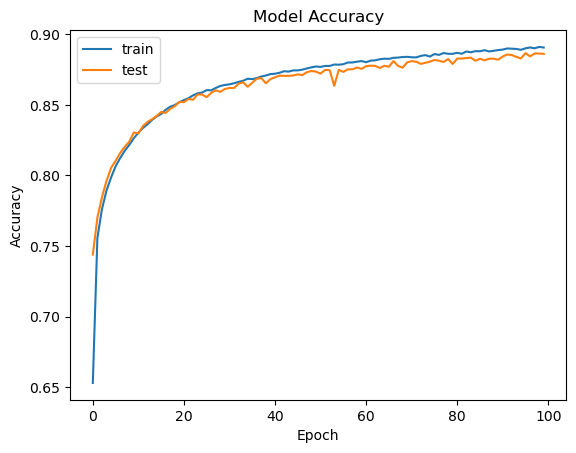

In [30]:
# List all data in history
print(model_history.history.keys())

# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

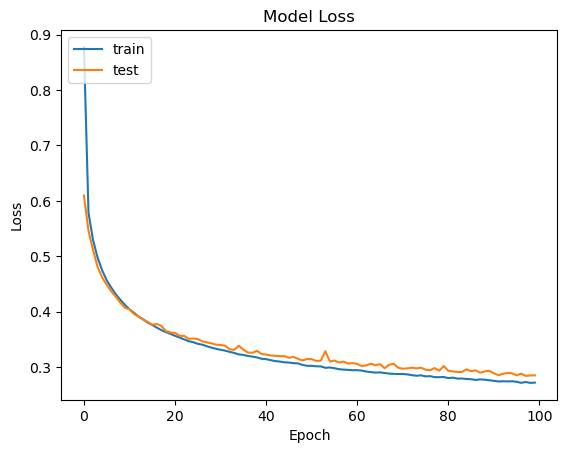

In [31]:
# Summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
cm = confusion_matrix(y_pred, y_test)

<AxesSubplot:>

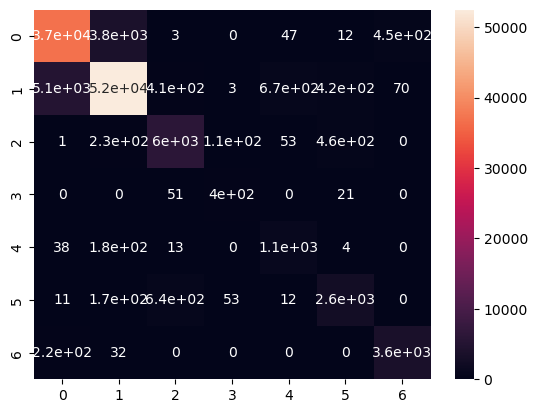

In [37]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

In [39]:
# tests
# define dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [40]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [41]:
import matplotlib.pyplot as plt

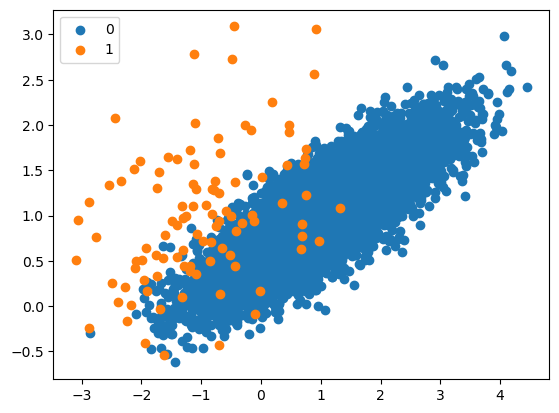

In [42]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [43]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [44]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


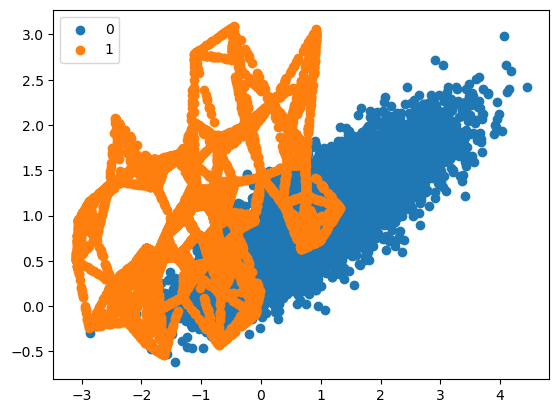

In [45]:
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [46]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


Counter({0: 1980, 1: 990})


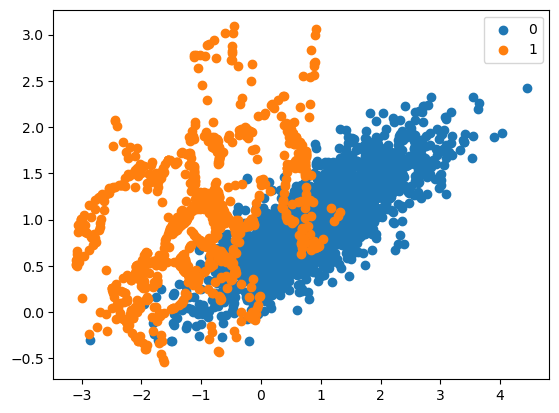

In [47]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [49]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [19]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.828
> k=2, Mean ROC AUC: 0.834
> k=3, Mean ROC AUC: 0.840
> k=4, Mean ROC AUC: 0.847
> k=5, Mean ROC AUC: 0.845
> k=6, Mean ROC AUC: 0.845
> k=7, Mean ROC AUC: 0.861


In [21]:
scores

array([0.91313131, 0.91464646, 0.86414141, 0.91616162, 0.91818182,
       0.82373737, 0.86565657, 0.77727273, 0.81868687, 0.92222222,
       0.86212121, 0.92222222, 0.86262626, 0.97272727, 0.91262626,
       0.82070707, 0.67575758, 0.81060606, 0.92121212, 0.81666667,
       0.81515152, 0.81363636, 0.91919192, 0.97020202, 0.72020202,
       0.86919192, 0.86717172, 0.76868687, 0.97171717, 0.81818182])